In [46]:
using Revise
using FourierOptics
using FFTW
using CairoMakie

In [47]:
my_theme = (
    resolution = (800, 800),
    font="Helvetica",
    Axis = (
        aspect=DataAspect(),
        titlesize=48,
        titlegap=30,
        xticklabelsize=32,
        yticklabelsize=32,
        xticklabelpad=20,
        yticklabelpad=20,
        xlabelsize=40,
        ylabelsize=40,
        xlabelpadding=10
    ),
    Heatmap = (
        colormap=:bone,
    )
)
set_theme!(theme_black(); my_theme...)

In [48]:
gpu = true

true

In [49]:
L = (18, 18) .* 1e-3
N = (1024, 1024)
λ = [420, 480, 543, 633] * 1e-9
d = 80e-2

0.8

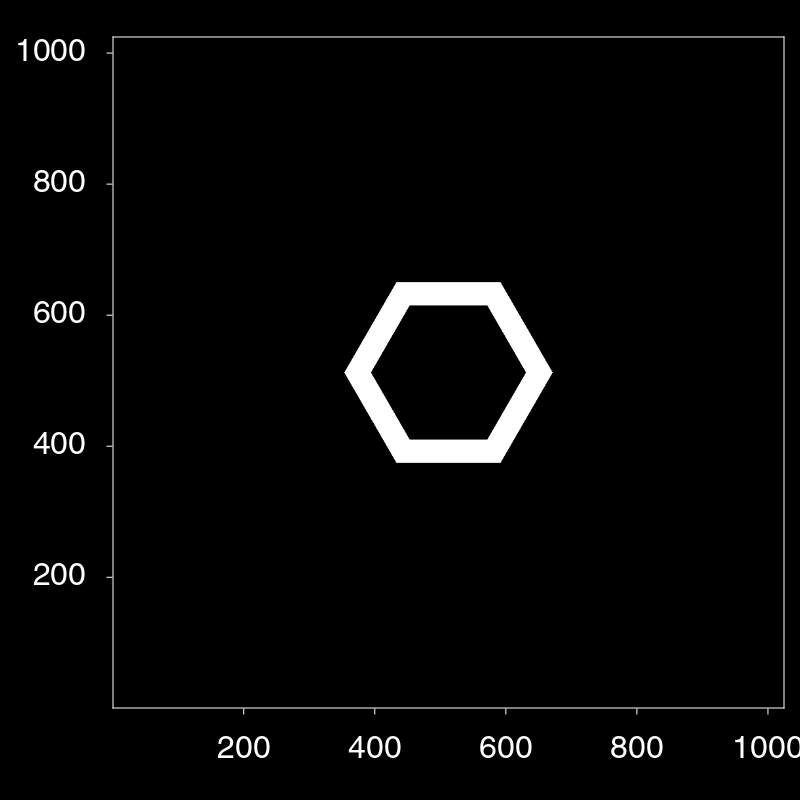

In [50]:
img_path = "../images/hexagon.png"
img_size = @. floor(Int, N * 5.6 / 18)
ap_img = aperture(N...; img_path=img_path, img_size=img_size)
heatmap(ap_img)

In [51]:
E = ap_img
u = [CoherentField2D(L, N, [λi], E, gpu=gpu) for λi in λ]
H = [propagatorTF(ui, d, gpu=gpu) for ui in u];

In [52]:
plan = plan_fft!(u[1])

CUFFT in-place complex forward plan for 1024×1024×1 CuArray of ComplexF32

In [53]:
for i in 1:length(λ)
    propTF!(u[i].E, H[i], plan)
end

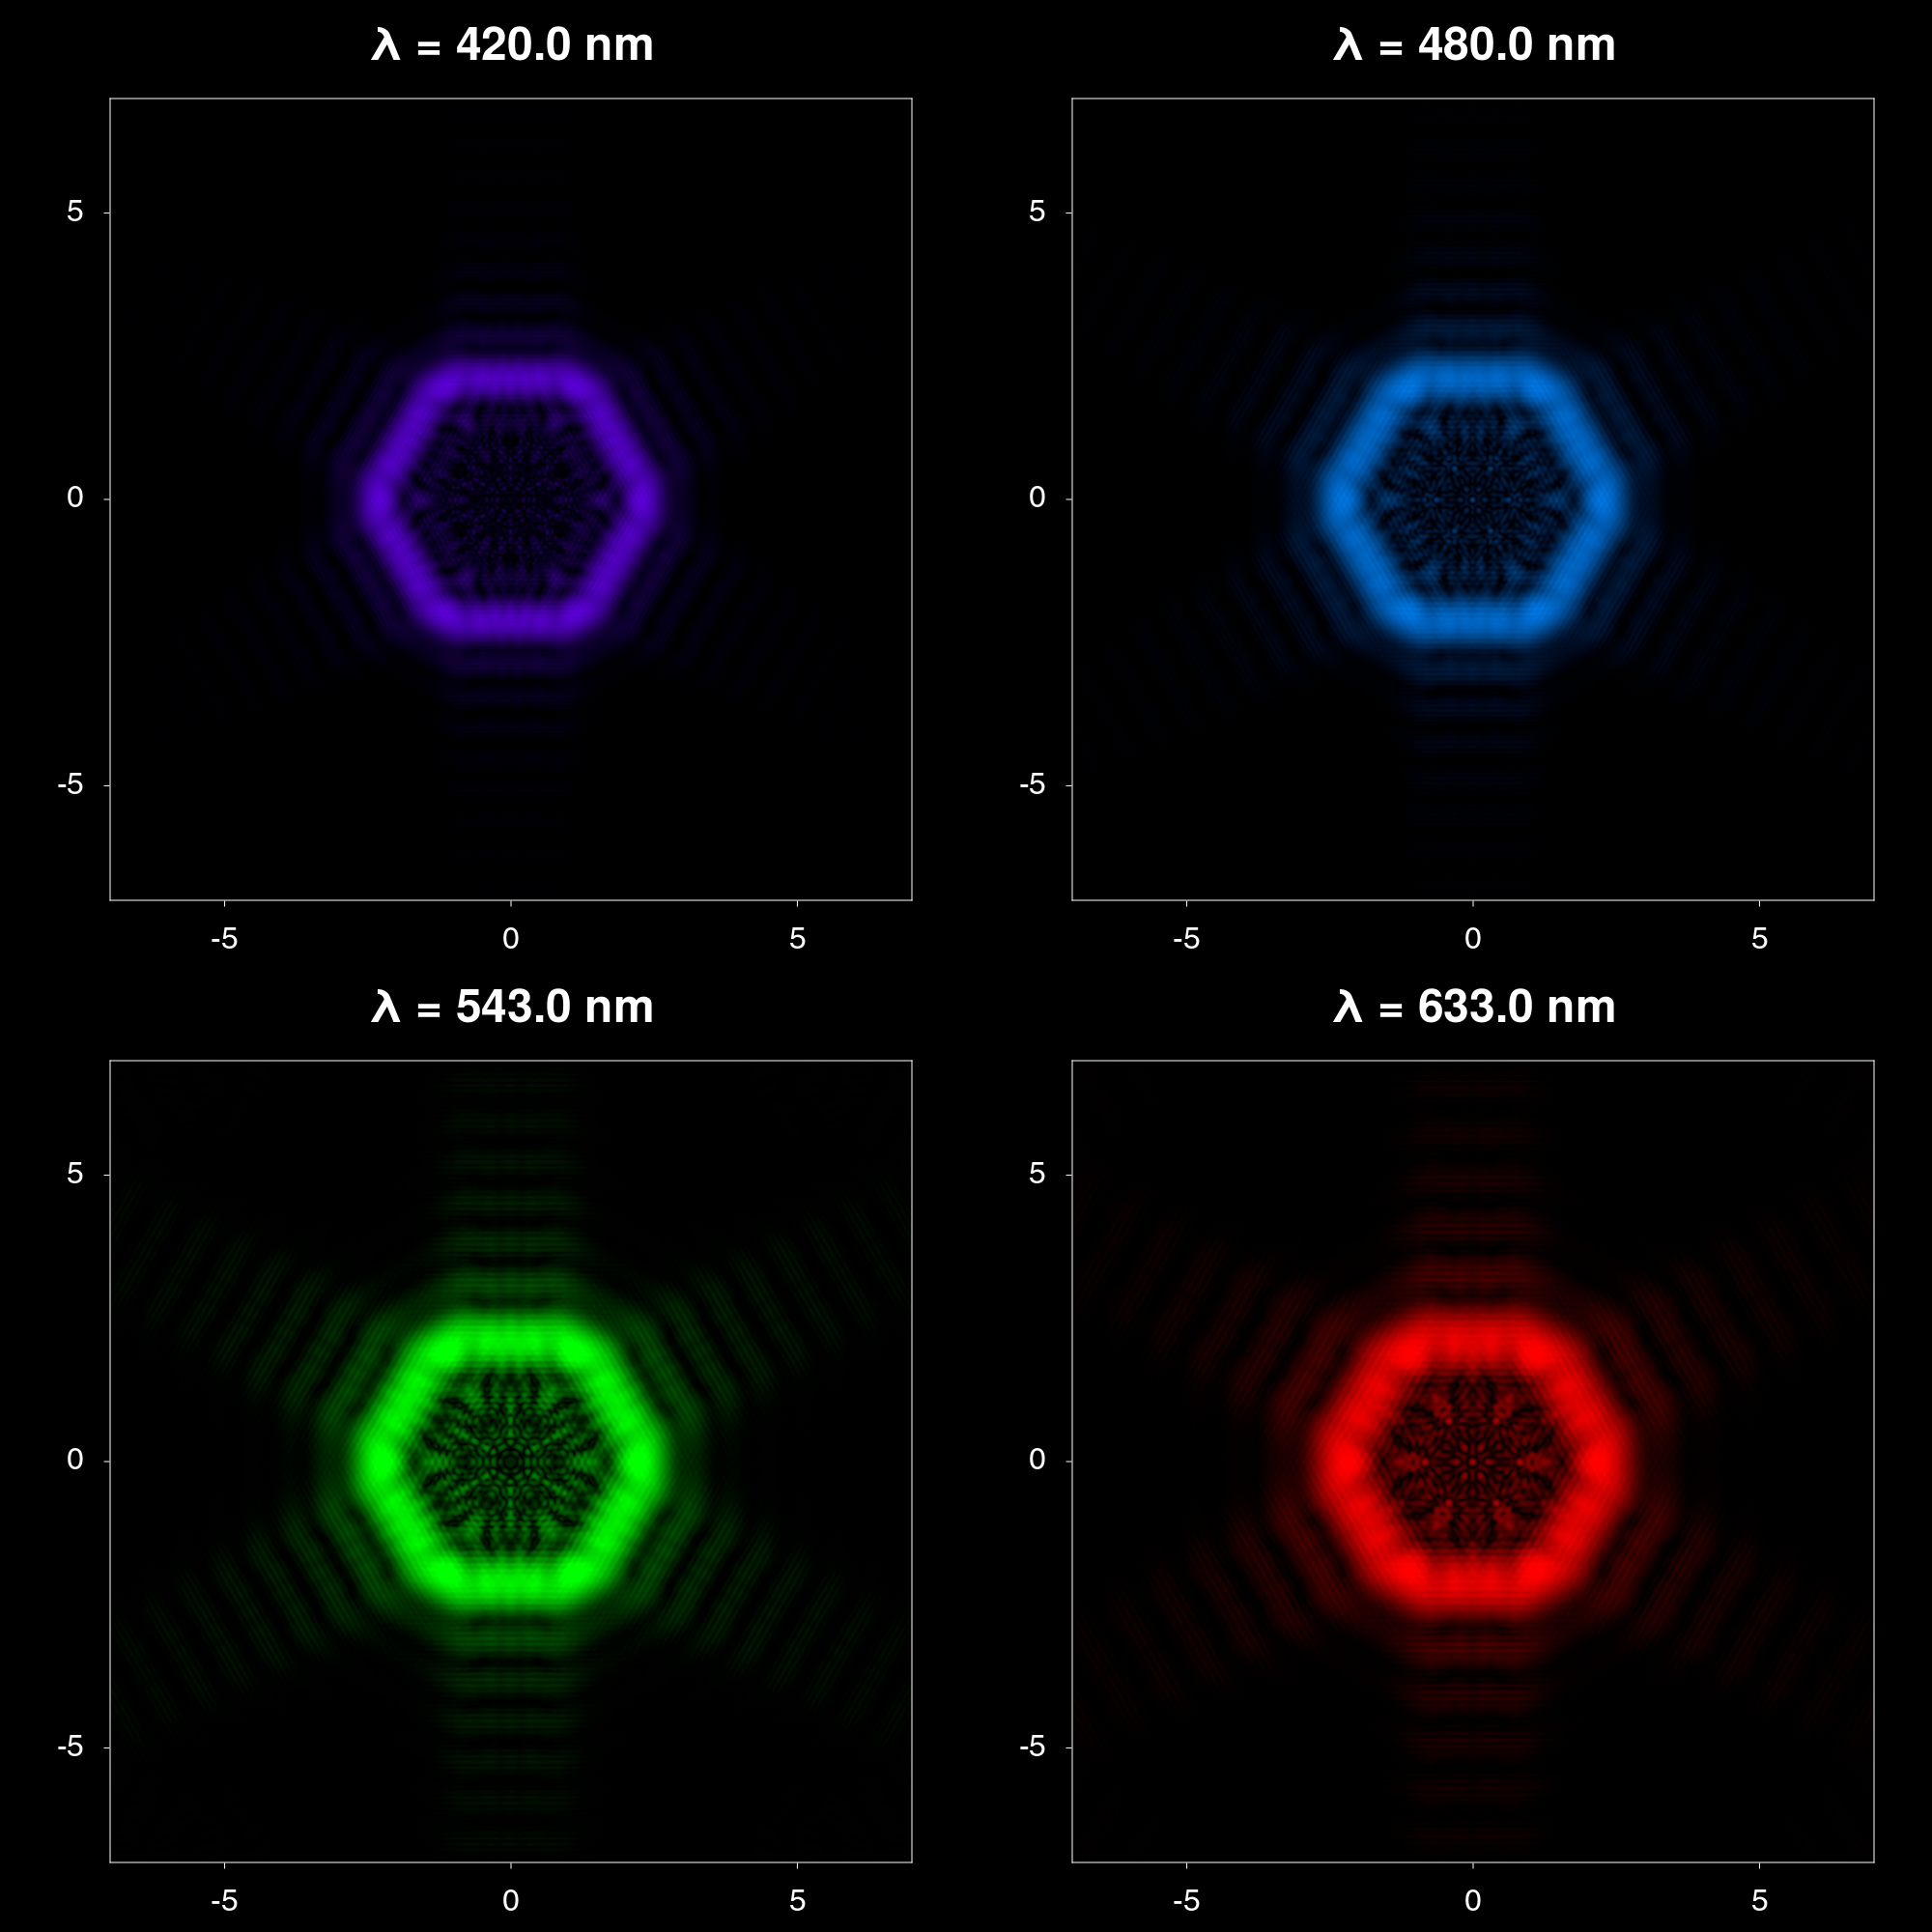

In [54]:
fig = Figure(resolution=(2000, 2000))
ax = [Axis(
    fig[j, i], 
    title = "λ = $(round(λ[i+2(j-1)]*1e9, digits=1)) nm",
    limits=(-7, 7, -7, 7)
) for i in 1:2, j in 1:2]

I_max = maximum(abs2, Base.Flatten([Array(ui.E) for ui in u]))

for i in 1:length(λ)
    image!(ax[i], 1000u[i].x, 1000u[i].y, get_color(u[i], I_max))
end
# save("hexagon_monochromatic.png", fig)
fig